<a href="https://colab.research.google.com/github/DebeckGZN/review_classification/blob/main/B2W_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Base de Dados: B2W Reviews

**Leitura dos dados e identificação das Colunas**

In [1]:
import pandas as pd

df_raw = pd.read_csv("B2W-Reviews01.csv", low_memory=False)
df_raw.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

**Selecionando apenas as Colunas de Interesse (Texto da Review e Nota)**

In [2]:
df = df_raw[['review_text','overall_rating']]
## adequando formato
df['review_text'].astype(str)
df['overall_rating'].astype(int)

print('Dimensão original: ', len(df))
df.sample(10)

Dimensão original:  132373


,review_text,overall_rating
125122,"Não fiquei satisfeita com este produto, no s...",2
83286,Continuo preferindo o amend. Ele não é tão pig...,2
31724,Esse é o segundo aparelho que adquiro. Já ins...,5
119795,Quando vO me entregar no saite tão doWndo que ...,1
13692,"O Samsung Essentials E35S é uma ótima compra, ...",4
99829,Não recomendo o produto. Apesar de muito boni...,1
69451,"O produto é excelente, preço justo e chegou an...",5
86529,"Muito bom o aparelho, está suprindo todas as m...",4
47241,A capinha é Boa Mas a película só cobre metad...,2
41011,Comprei 3 kits e nenhum veio nas cores e quant...,2


**Pré-Processamento**

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords

sw = stopwords.words('portuguese')

#exemplos incompletos
df = df.dropna()
#lowercase
df['review_text'] = df['review_text'].str.lower()
#removendo stopwords
df['review_text'] = df['review_text'].apply(lambda words: ' '.join(word for word in words.split() if word not in sw))

In [5]:
raw_data_size = len(df)

raw_reviews = list(df['review_text'])
raw_score = list(df['overall_rating'])

**Visualizando os Dados**

In [6]:
from random import randrange

idx = randrange(raw_data_size)

print(raw_reviews[idx]," Nota: " ,raw_score[idx])

perfume boa fragrância boa fixação. preço então melhor ainda.  Nota:  3


Scores

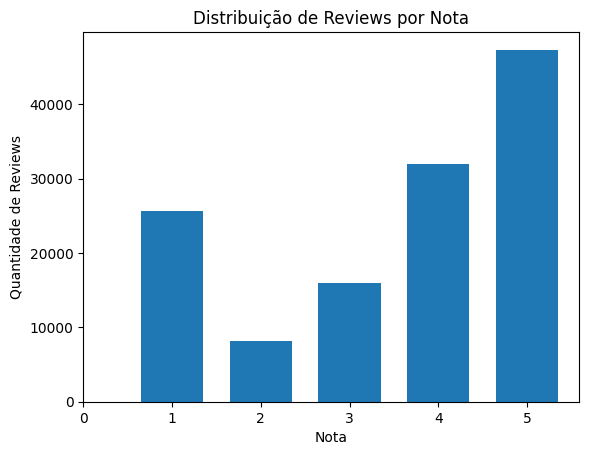

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = raw_score
bins = np.arange(1,7) - 0.5
plt.hist(x, bins, range=(1,6), rwidth=0.7)
plt.xticks(range(6))
plt.xlabel('Nota')
plt.ylabel('Quantidade de Reviews')
plt.title('Distribuição de Reviews por Nota')
plt.show()

Tamanho das Reviews (nº de palavras)

Maior Review:  617 palavras
entrega super rápida, antes prazo.voltarei fazer novas compra, super recomendo site. 11


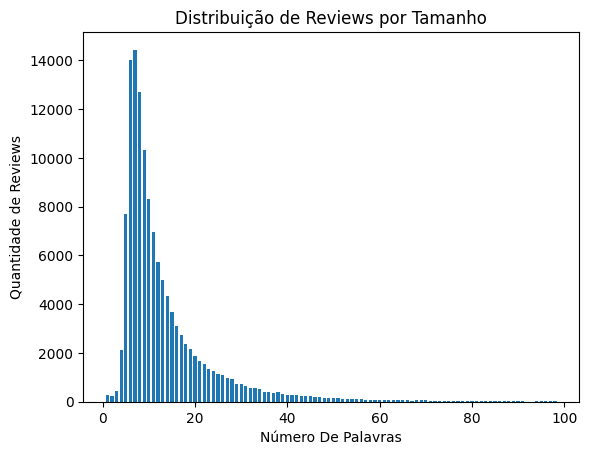

In [8]:
review_len = []

for rv in raw_reviews:
    split_rv = rv.split(' ')
    review_size = len(split_rv)
    review_len.append(review_size)

max_len = 0
for i in review_len:
  if i > max_len:
    max_len = i

print("Maior Review: ",max_len, "palavras")
idx = randrange(raw_data_size)
print(raw_reviews[idx], review_len[idx])

x = review_len

bins = np.arange(1,100) - 0.5
plt.hist(x, bins, range=(1,max_len), rwidth=0.7)
#plt.xticks(range(25))
plt.xlabel('Número De Palavras')
plt.ylabel('Quantidade de Reviews')
plt.title('Distribuição de Reviews por Tamanho')

plt.show()

**Remoção dos Exemplos nota 3**

In [9]:
# separamos as reviews nota 3 para avalição após a classificação
df_nota3 = df[df['overall_rating'] == 3].reset_index(drop=True)

df = df.drop(df[df.overall_rating == 3].index)
df = df.drop(df[df.review_text.str.split().str.len() > 50].index)
data_size = len(df)

# exemplos para validação
pred_sample_size = 1000
predict_sample = df[-pred_sample_size:].reset_index(drop=True)

df = df[:data_size - pred_sample_size]
print('Dimensão pós filtros: ', data_size)

reviews = list(df['review_text'])
score = list(df['overall_rating'])

Dimensão pós filtros:  110867


**Transformando Scores em Labels:**

4-5: Positivo [1]

1-2: Negativo [0]

In [10]:
for i, n in enumerate(score):
  if n >3:
    score[i] = 1 ##Positivo
  else:
    score[i] = 0 ##Negativo


**Visualização dos Dados pós processados**

Distribuição Positivo x Negativo

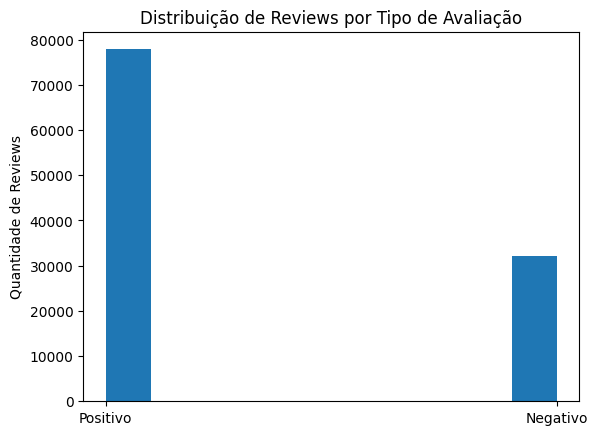

In [11]:
score_tag = []

for i in score:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')


x = score_tag
plt.hist(x, range=(0,1))
plt.ylabel('Quantidade de Reviews')
plt.title('Distribuição de Reviews por Tipo de Avaliação')
plt.show()

Tamanho das Reviews



ótimo site chegou antes data programada!!! recomendo telefone 3 geração j7 compro...melhor custo beneficio 14


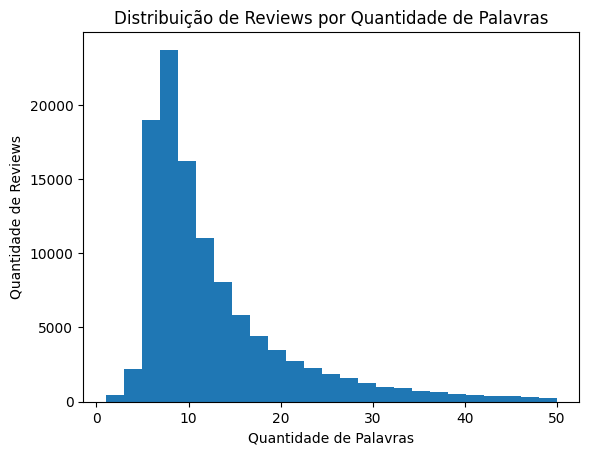

In [12]:
review_len = []

for rv in reviews:
  split_rv = rv.split(' ')
  review_size = len(split_rv)
  review_len.append(review_size)

idx = randrange(data_size)
print(reviews[idx], review_len[idx])

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.ylabel('Quantidade de Reviews')
plt.xlabel('Quantidade de Palavras')
plt.title('Distribuição de Reviews por Quantidade de Palavras')
plt.show()

Separando bases de Treino e Teste

In [13]:
from sklearn.model_selection import train_test_split

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(reviews, score, test_size=0.3,random_state=42)

Scores

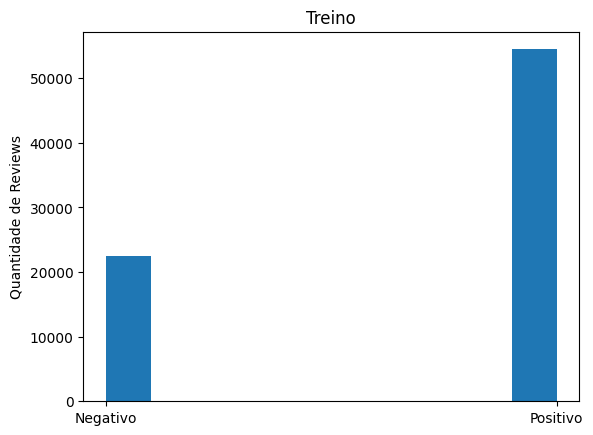

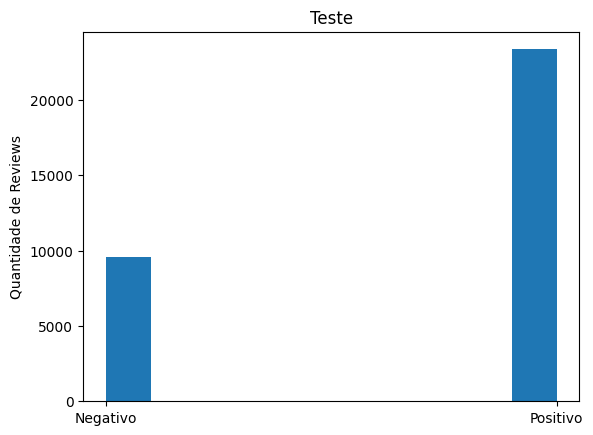

In [14]:
score_tag = []
for i in training_labels:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')

score_tag.sort()
x = score_tag
plt.hist(x)
plt.title('Treino')
plt.ylabel('Quantidade de Reviews')
plt.show()

score_tag = []
for i in testing_labels:
  if i  == 1:
    score_tag.append('Positivo')
  else:
    score_tag.append('Negativo')

score_tag.sort()
x = score_tag
plt.hist(x)
plt.title('Teste')
plt.ylabel('Quantidade de Reviews')
plt.show()

Tamanho das Reviews

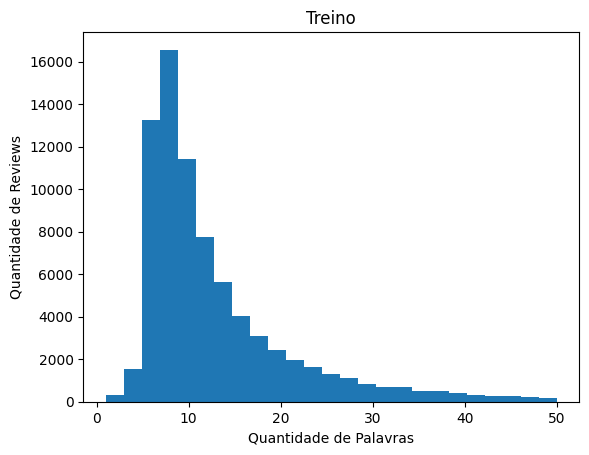

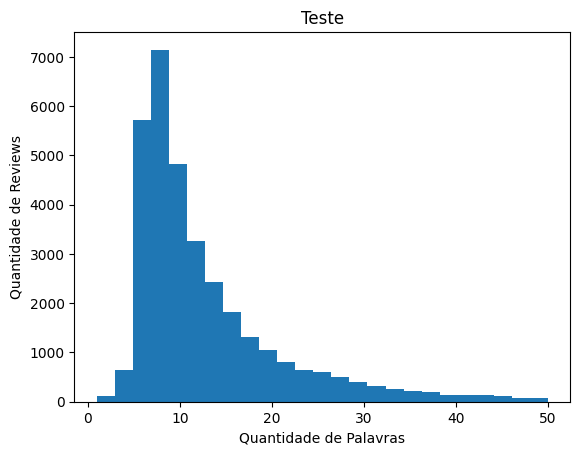

In [15]:
review_len = []
for rv in training_sentences:
  split_rv = rv.split(' ')
  review_len.append(len(split_rv))

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.title('Treino')
plt.ylabel('Quantidade de Reviews')
plt.xlabel('Quantidade de Palavras')
plt.show()

review_len = []
for rv in testing_sentences:
  split_rv = rv.split(' ')
  review_len.append(len(split_rv))

x = review_len
plt.hist(x, bins = 25, range=(1,50))
plt.title('Teste')
plt.ylabel('Quantidade de Reviews')
plt.xlabel('Quantidade de Palavras')
plt.show()

**Tensorflow Libraries**

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

**Tokenização**

Dividindo as sentenças em palavras (tokens) e atribuindo um valor numérico

In [17]:
## Tokenizer se aplica apenas a base de Treino
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

36337


Padding e criação das Sequências

In [18]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post', maxlen=50)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding='post', maxlen=50)


Visualizando as Sequências

In [19]:
keys = list(word_index.keys())
values = list(word_index.values())

idx = randrange(len(training_sequences))

ex_sentence = ''

for i in training_sequences[idx]:
  ex_sentence += ' ' + keys[values.index(i)]

print(ex_sentence, training_labels[idx])


 chegou bem antes prazo celular ótimo camera boa bateria dura mesmo simplesmente celular incrivel arrependo ter comprado ele além americanas parabéns responsável 1


Formatação para Treinamento

In [20]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Criação do Modelo

In [21]:
vocab_size = 5000
embedding_dim = 16
max_length = 50
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,
                          kernel_regularizer=tf.keras.regularizers.l1(0.01),
                          activity_regularizer=tf.keras.regularizers.l2(0.01),
                          activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            80000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 80433 (314.19 KB)
Trainable params: 80433 (314.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Treinamento

In [22]:
num_epochs = 100
es = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, verbose=1)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[es])

Epoch 1/100
2404/2404 [==============================] - 12s 5ms/step - loss: 0.5369 - accuracy: 0.7895 - val_loss: 0.3436 - val_accuracy: 0.9029
Epoch 2/100
2404/2404 [==============================] - 10s 4ms/step - loss: 0.3032 - accuracy: 0.9195 - val_loss: 0.2808 - val_accuracy: 0.9236
Epoch 3/100
2404/2404 [==============================] - 9s 4ms/step - loss: 0.2613 - accuracy: 0.9316 - val_loss: 0.2553 - val_accuracy: 0.9296
Epoch 4/100
2404/2404 [==============================] - 11s 4ms/step - loss: 0.2388 - accuracy: 0.9371 - val_loss: 0.2389 - val_accuracy: 0.9319
Epoch 5/100
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2233 - accuracy: 0.9401 - val_loss: 0.2293 - val_accuracy: 0.9306
Epoch 6/100
2404/2404 [==============================] - 9s 4ms/step - loss: 0.2117 - accuracy: 0.9424 - val_loss: 0.2199 - val_accuracy: 0.9340
Epoch 7/100
2404/2404 [==============================] - 10s 4ms/step - loss: 0.2031 - accuracy: 0.9439 - val_loss: 0.2140 - v

Desempenho do modelo

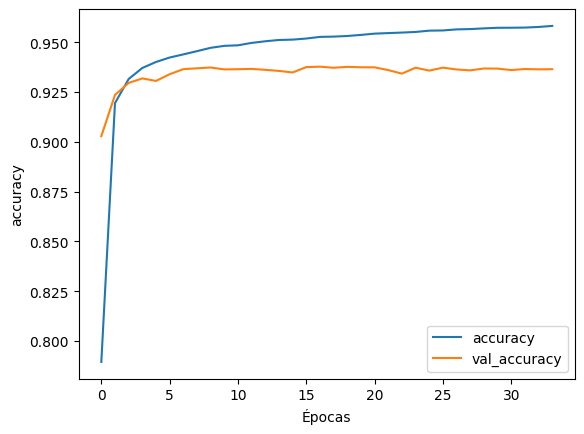

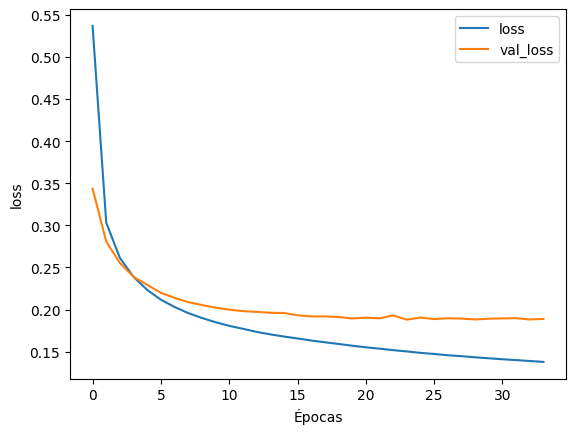

In [23]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Épocas")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Predição

In [24]:
sample_sentences = list(predict_sample['review_text'])
sample_scores = list(predict_sample['overall_rating'])

sequences = tokenizer.texts_to_sequences(sample_sentences)
padded = pad_sequences(sequences, padding='post', maxlen=50,truncating='post')

predictions = model.predict(padded)
idxs=[]
for i in range (10):
  idxs.append(randrange(len(sample_sentences)))

for idx in idxs:
  pred = predictions[idx]
  sentence = predict_sample.at[idx,'review_text']
  score = sample_scores[idx]

  print(sentence)
  print(score, pred)

32/32 [==============================] - 0s 2ms/step
produto boa qualidade excelente acabamento resistente duradoura pois quesito satisfação deixa reclamar bom saber futuro próximo novos produtos sendo pratico atende rapidamente quesito desejado
5 [0.9999831]
nada declarar. produto atendendo necessidades conforme compra efetuada.
4 [0.99035233]
migrei linha samsung galaxy(s6 edge) devido alto custo pouco hardware. arrependimento 0. zenfone 4 roda liso, câmera boa preço conta comparado concorrência. sobra memória desempenho. dificilmente sairei marca asus partir agora. recomendo.
5 [0.989358]
faz tempo q compro site lojas americanas sempre vem tudo certinho antes data super recomendo vcs parabéns!!!!
5 [0.99770445]
ótimo produto.. indico todos! show. kkkkkķkkkkk
4 [0.9988466]
prático, eficiente rápido cozinha. lâminas super afiadas.
4 [0.9967778]
gostei produto. ótimo atendimento. produto chegou data prevista.
4 [0.99313736]
duração bateria esperava! pode mexer vontade, média dia meio. 

**Outliers**

In [25]:
outliers = []

for lines in range(len(predictions)):
    s = sample_scores[lines]
    p = predictions[lines]
    st = sample_sentences[lines]

    if s>3:
      if p<0.5:
        outliers.append([st, s, p[0]])
    else:
      if p>0.5:
        outliers.append([st, s, p[0]])

print(len(outliers))

idx = randrange(len(outliers))

print(outliers[idx][0],outliers[idx][1],outliers[idx][2])


53
tamanho p serve idade? filha três anos pedindo muito, pesa 21kilis mede 1metro, bem fortinha 5 0.16097671


In [26]:
sample_sentences = list(df_nota3['review_text'])
sample_scores = list(df_nota3['overall_rating'])

sequences = tokenizer.texts_to_sequences(sample_sentences)
padded = pad_sequences(sequences, padding='post', maxlen=50,truncating='post')

predictions = model.predict(padded)
idxs=[]
for i in range (10):
  idxs.append(randrange(len(sample_sentences)))

for idx in idxs:
  pred = predictions[idx]
  sentence = df_nota3.at[idx,'review_text']
  score = sample_scores[idx]

  print(sentence)
  print(score, pred)

501/501 [==============================] - 1s 2ms/step
situações conforme produto: 1 - gela bem; 2 - bonito. situações conforme produto: 1 - exala cheiros fortes similar esgoto barata doctor vírus acionado; 2 - controle remoto varias funções, porem estás somente enfeite; 3 - faz ruídos acionado alta rotação; 3 - entrega demorada.
3 [0.9570809]
calca show problema ficou apertada deveria ter comprado numero maior.
3 [0.90366715]
produto bem bonito, copo ótimo tamanho, achei potência fraca (700w), escolhi justamente 700w imaginei q bem potente. fim, esperava produto, acho q pode atender bem coisas tão pesadas.
3 [0.95303684]
gostei muito!!! atendendo expectativas, ainda conhecendo melhor produto.
3 [0.9974939]
leitura interessante, agradável curiosa onde destino todo império final envolto brumas, apenas força sobrenatural capaz desvendar mistérios assolam habitantes.
3 [0.82015735]
bom bom produto entrega rápida ótimo estado recomendo compras americanas .com.
3 [0.9996354]
bom funcionando

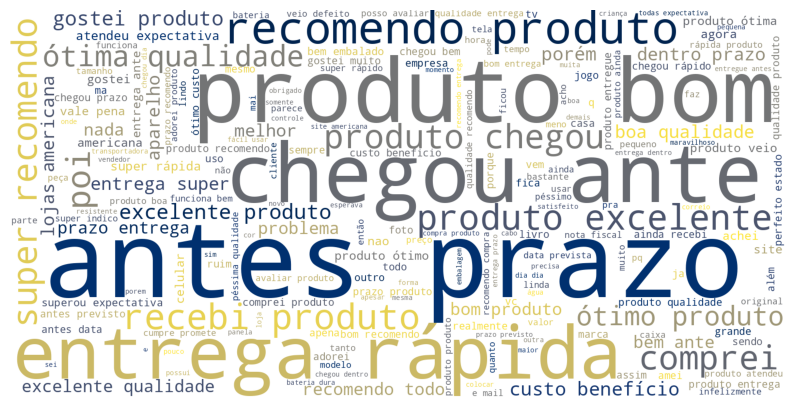

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
summary = df['review_text'].dropna()
all_summary = " ".join(s for s in summary)
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      colormap='cividis',
                      width=1600, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

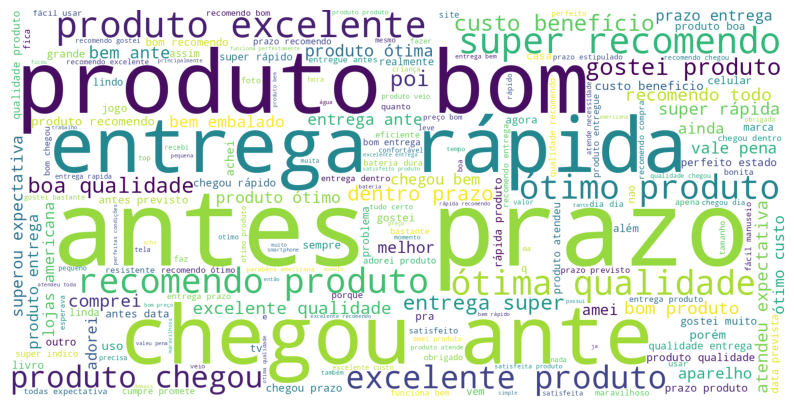

In [28]:
summary = df[df['overall_rating'] > 3].dropna(subset='review_text')['review_text']
all_summary = " ".join(s for s in summary)
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

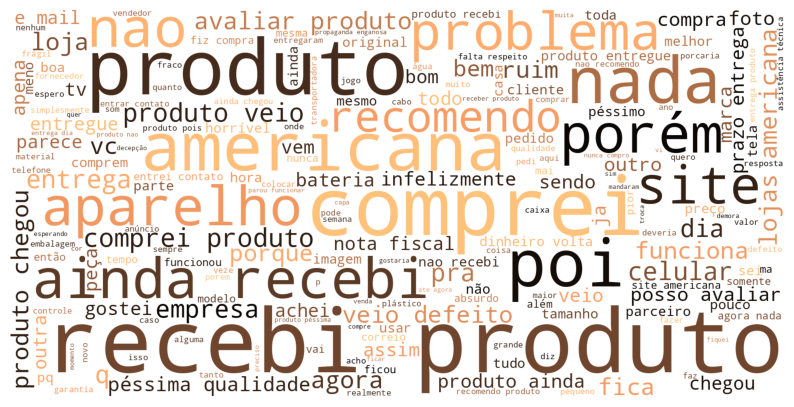

In [29]:
summary = df[df['overall_rating'] < 3].dropna(subset='review_text')['review_text']
all_summary = " ".join(s for s in summary)
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      colormap='copper',
                      width=1600, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);